### Mean and median

In [1]:
import pandas as pd

#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','Chanchal','Gasper','Naviya','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}

In [2]:
d

{'Name': 0          Tom
 1        James
 2        Ricky
 3          Vin
 4        Steve
 5        Smith
 6         Jack
 7          Lee
 8     Chanchal
 9       Gasper
 10      Naviya
 11      Andres
 dtype: object,
 'Age': 0     25
 1     26
 2     25
 3     23
 4     30
 5     29
 6     23
 7     34
 8     40
 9     30
 10    51
 11    46
 dtype: int64,
 'Rating': 0     4.23
 1     3.24
 2     3.98
 3     2.56
 4     3.20
 5     4.60
 6     3.80
 7     3.78
 8     2.98
 9     4.80
 10    4.10
 11    3.65
 dtype: float64}

In [3]:
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,Chanchal,40,2.98
9,Gasper,30,4.80


In [4]:
#Mean
df.mean()

Age       31.833333
Rating     3.743333
dtype: float64

In [5]:
#Median
df.median()

Age       29.50
Rating     3.79
dtype: float64

### Mode

In [11]:
pd.Series(['1','1','2','3','3','3']).mode()

0    3
dtype: object

### Standard Deviation

In [12]:
df.std()

Age       9.232682
Rating    0.661628
dtype: float64

### Skewness
- It used to determine whether the data is symmetric or skewed. If the index is between -1 and 1, then the distribution is symmetric.
- less than -1 implies left skew
- more than 1 implies right skew

In [14]:
df.skew()
# Here rating is symmetric and age is skewed to the right

Age       1.135089
Rating   -0.153629
dtype: float64

### Random numbers

In [50]:
import random
random.seed(12)

In [53]:
#Get a random integer within a specified range
random.randint(0,10)

6

In [55]:
#Get a random element from a sequence
random.choice([1,2,3,4,5,6])

4

In [56]:
#Get a random real number between 0 to 1
random.random()

0.15182916951419145

In [57]:
#Get a random real number within a specified range
random.uniform(0,10)

4.3645592692498845

### Uniform distribution
- values within a certain range are equally likely to occur
- values outside that range never occur

In [36]:
import scipy.stats as stats

In [41]:
# Generate 100,000 numbers from a uniform distribution and plot them
# rvs is the function that generates random numbers from the specified distribution

stats.uniform.rvs(size=100000,
                 loc=0, #from 0
                 scale=10 #to 10
                 )


array([8.68624285, 3.05178084, 0.19246017, ..., 0.22995989, 1.01076915,
       4.56234019])

In [42]:
uniform_data = stats.uniform.rvs(size=100000,
                 loc=0, #from 0
                 scale=10 #to 10
                 )

<AxesSubplot:ylabel='Density'>

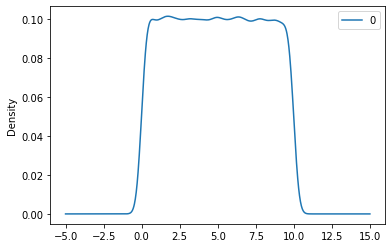

In [43]:
pd.DataFrame(uniform_data).plot(kind='density')

In [44]:
# cdf is used to find the probability that an observation drawn from the distribution falls below a specific value
# it gives area under the distribution's density curve upto a certain value on the x axis
stats.uniform.cdf(x=2.5, #cutoff value (quantile) to check
                 loc=0,
                 scale=10)
# In the uniform distribution we have, there is a 25% chance that an observation will be in the range 0 to 2.5 and 
# 75% chance that it will fall in the range 2.5 to 10

0.25

In [45]:
# ppf is inverse of cdf
# it return x axist cutoff value associated with a given probability
# example - get cutoff value for which we have 40% chance of drawing an observation below that value
stats.uniform.ppf(q=0.4, #probability cutoff
                 loc=0, #distribution start
                 scale=10) #distribution end
# At x axis value of 4, we can slice the distribution such that 40% of it is to the left

4.0

In [48]:
# pdf gives the actual probability density (i.e height of the distribution) at a given value of x
# since uniform distribution is flat, all x values within its range will have same probability density and all values
# outside of that range with have probability density of 0
for x in range(-1,12,3):
    print (f"Density at x value {x}.")
    print(stats.uniform.pdf(x,loc=0,scale=10))

Density at x value -1.
0.0
Density at x value 2.
0.1
Density at x value 5.
0.1
Density at x value 8.
0.1
Density at x value 11.
0.0


### Normal distribution/Gaussian distribution

In [ ]:
from scipy.stats import norm
stats.norm.rvs()

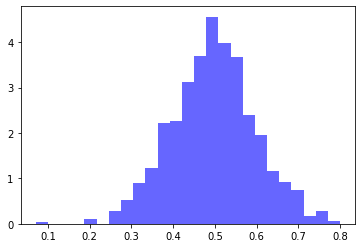

In [33]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 0.5, 0.1
s = np.random.normal(mu, sigma, 1000)
plt.hist(s, bins=25, density=True, alpha=0.6, color='b')
plt.show()

In [58]:
#Find the quantile for the 2.5% cutoff
print(stats.norm.ppf(q=0.025))

-1.9599639845400545


In [60]:
#Find the quantile for the 97.5% cutoff
print(stats.norm.ppf(q=0.975))

1.959963984540054


In [61]:
#Find how much data is below -3
print(stats.norm.cdf(x=-3))

0.0013498980316300933


In [62]:
#Find how much data is below 3
print(stats.norm.cdf(x=3))

0.9986501019683699


### Binomial distribution
- only 2 possible outcomes in a series of experiments (discrete probability distribution)
- finding probability of success
- 2 parameters: probability of success in any given trial and number of trials
- Binomial distribution tells you how likely it is to achieve given number of successes in n trials of the experiment

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts  10  102  421  1162  2115  2442  2056  1170  440  72  10


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

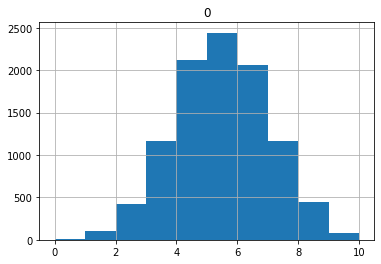

In [68]:
# Flipping a fair coin 10 times = 1 trial
from scipy.stats import binom

coin=stats.binom.rvs(size=10000 # number of trials
          ,n=10 #number of flips in a trial
          ,p=0.5 #probability of success
         )

print(pd.crosstab(index="counts",columns=coin))
# The crosstab shows that getting 0 heads for all 10 times is really low. Out of 10,000, it was only 10 times that all
# flips were tails
# Same way, getting 10 heads in a row is really unlikely. That happened only 3 times.
pd.DataFrame(coin).hist()

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   6  75  260  895  2045  2962  2645  1111


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

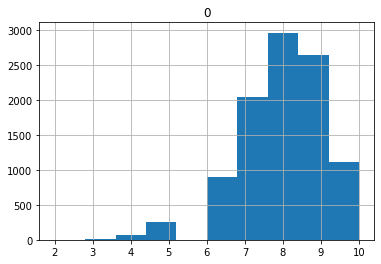

In [69]:
# Flipping a UNFAIR coin 10 times = 1 trial
from scipy.stats import binom

coin=stats.binom.rvs(size=10000 # number of trials
          ,n=10 #number of flips in a trial
          ,p=0.8 #probability of success
         )

print(pd.crosstab(index="counts",columns=coin))
# The crosstab shows that getting 0 heads for all 10 times is really low. Out of 10,000, it was only 10 times that all
# flips were tails
# Same way, getting 10 heads in a row is really unlikely. That happened only 3 times.
pd.DataFrame(coin).hist()

In [70]:
#cdf() function lets you check the probability of achieving a number of successes within a certain range
stats.binom.cdf(k=5, #probability of 5 success or less
               n=10, #with 10 flips
               p=0.8) #success probability 0.8

0.03279349759999997

In [71]:
1-stats.binom.cdf(k=8, #probability of MORE than 8 success
               n=10, #with 10 flips
               p=0.8) #success probability 0.8

0.37580963840000015

In [72]:
#For discrete distri, there is no pdf to check probability density at value x
#There is pmf (probability mass function) which gives proportion of observations at given number of success k
stats.binom.pmf(k=5, #probability of 5 success 
               n=10, #with 10 flips
               p=0.5) #success probability 0.8

0.24609375000000003

### Geometric distribution
- Model the amount of time it takes for an event to occur
- Discrete
- Models the amount of trials it takes to achieve success in a repeated experiment with a given probability of success

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14
row_0                                                                  
counts  5078  2502  1245  598  303  133  78  25  19   9   4   3   2   1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

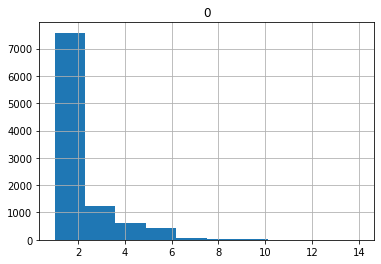

In [73]:
# If success = heads, how many trials does it take to get success when filpping a fair coin
heads = stats.geom.rvs(size = 10000, #We generate 10000 trails of flips
                      p=0.5) #fair coin

print(pd.crosstab(index="counts", columns = heads))
#In the crosstab we can see, half of the time, it takes only 1 flip to get a head. 
#That makes sense as we are flipping a fair coin


pd.DataFrame(heads).hist()
# So the graph is right skewed


In [75]:
# Get probability of success in first 5 flips
first_five = stats.geom.cdf(k=5,
                           p=0.5)
print(first_five)
#Probability of getting success in 6 or more flips
print(1-first_five)
# As expected, it takes a low value of only 3.1%. So only 3.1% of the times, it takes 6 or
#more flips to get success on a fair coin

0.96875
0.03125


In [76]:
#Probability of needing exactly 2 flips to get the first success
stats.geom.pmf(k=2,
              p=0.5)
# 25% of the time, we will need exactly 2 flips to see a head

0.25

### Exponential distribution
- Model the amount of time it takes for an event to occur
- Continuous version of geometric distribution
- Models the amount of time you have to wait for a certain event to occur, given an occurance rate

In [77]:
# Probability of waiting more than 1 time unit to get a success
prob = stats.expon.cdf(x=1,
                      scale=1) #arrival rate
1-prob

# Average arrival time for exponential distribution is 1/arrive_rate

0.36787944117144233

### Poisson distribution
- Model's the probability of seeing a certain number of successes within a given time interval
(where the time it takes for next event to occur is modeled by exponential distribution)

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3629  3707  1877  629  131  21  5  1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

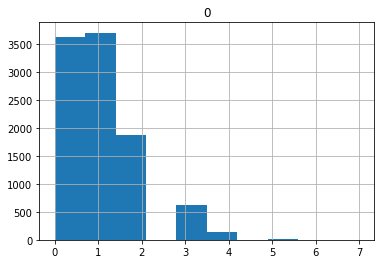

In [84]:
# Considering arrival rate of 1 per time unit, how many arrivals happen in 1 time unit
arr = stats.poisson.rvs(size=10000,
                       mu=1) #average arrival time 1

print(pd.crosstab(index='counts', columns = arr))

pd.DataFrame(arr).hist()

#So we often see 0 arrival in 1 time unit, we see 1 and 2 arrivals in 1 time unit
#We see more than 2 arrivals in that time with lesser probability
#So sometimes we have more busy hours

col_0   0   1   2   3    4    5    6    7     8     9   ...   15   16   17  \
row_0                                                   ...                  
counts   1   4  15  71  190  379  636  921  1110  1272  ...  332  207  134   

col_0   18  19  20  21  22  23  25  
row_0                               
counts  68  39  26   4   1   1   1  

[1 rows x 25 columns]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

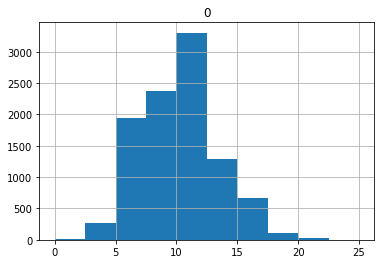

In [87]:
# If we had a higher arrival rate, we would see not such a right skew as above
arr = stats.poisson.rvs(size=10000,
                       mu=10) #average arrival time 10

print(pd.crosstab(index='counts', columns = arr))

pd.DataFrame(arr).hist()

#We can see here that sometimes here, we even see 20 arrivals when the arrival rate is 10/hour